### Гуаниновые квадруплексы

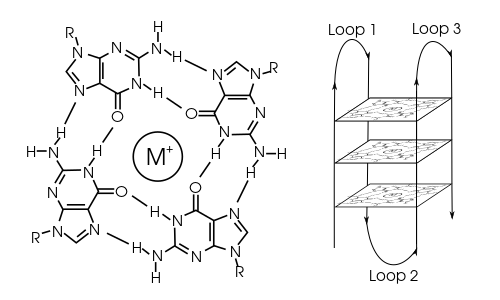

In [ ]:
!wget http://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/chr22.fa.gz
#скачиваем архив с 22ой хромосомой hg19

--2022-05-23 10:05:42--  http://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/chr22.fa.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11327826 (11M) [application/x-gzip]
Saving to: ‘chr22.fa.gz’

chr22.fa.gz         100%[===================>]  10.80M  7.22MB/s    in 1.5s    

2022-05-23 10:05:44 (7.22 MB/s) - ‘chr22.fa.gz’ saved [11327826/11327826]



In [ ]:
!gunzip ./chr22.fa.gz #разархивируем её

In [ ]:
!head chr22.fa

>chr22
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


In [ ]:
!pip install biopython #устанавливаем biopython

Для тренировки и проверки выражений можно использовать
https://regex101.com/ 

Хороший пост на хабре про регулярные выражения 
https://habr.com/ru/post/349860/

In [ ]:
import re 
from Bio import SeqIO 
input_file="./chr22.fa"
fasta_sequence = SeqIO.parse(input_file,'fasta') #загружаем последовательность
for record in SeqIO.parse(input_file, "fasta"): 
 print("%s %i" % (record.id, len(record))) 
 name, sequence = record.id, str(record.seq) 
pattern="(?:G{3,}[ATGC]{1,7}){3,}G{3,}" #патерн регулярного выражения для поиска квадруплекса (3 гуанина, потом из набора ATGC 1-7 нуклеотида; эта группа повторяется 3 раза и заканчивается 3 гуанинами)
PQS=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern,sequence)] #finditer возвращает итератор, у которого есть [начало нашего совпадения; конец; группы, которые захватывает (последовательность квадруплекса)]
len(PQS) 

chr22 51304566


3542

In [ ]:
PQS[:10]

[[16074765, 16074795, 'GGGGGAACTGGGCACTGTGGGACAGGAGGG'],
 [16075587, 16075611, 'GGGAACGGGGTGGGTGCCGAGGGG'],
 [16075634, 16075662, 'GGGGTCCGGCTGGGGGACATGGGATGGG'],
 [16085119, 16085137, 'GGGGGGGGTCGGGGGGGG'],
 [16156722, 16156763, 'GGGTTGGGGTGACCGAGGGACAGGTGGGGCGGGCACCTGGG'],
 [16157900, 16157922, 'GGGATGGCGGGCTTCGGGTGGG'],
 [16194833, 16194861, 'GGGGGAGGGTCAGGGGTTCCCCAGGGGG'],
 [16340589, 16340619, 'GGGATGCTGGGGACCCCTGGGGGATCGGGG'],
 [16404612, 16404644, 'GGGAGGGGGCCGGGAGCCAGGGGCAGCTCGGG'],
 [16466921, 16466947, 'GGGCAGGGTCCGGCTGGGCGTCGGGG']]

In [ ]:
with open('./GQregex.bed', 'a') as the_file:
    for i in range(1,len(PQS)):
      the_file.write("chr22\t"+str(PQS[i][0])+"\t"+str(PQS[i][1])+"\n")  

In [ ]:
!head ./GQregex.bed

chr22	16075587	16075611
chr22	16075634	16075662
chr22	16085119	16085137
chr22	16156722	16156763
chr22	16157900	16157922
chr22	16194833	16194861
chr22	16340589	16340619
chr22	16404612	16404644
chr22	16466921	16466947
chr22	16869015	16869041


Теперь сравним наш паттерн с эксперементом

Скачаем результаты Сhip seq

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE107nnn/GSE107690/suppl/GSE107690_K562_High_confidence_peaks.bed.gz

--2022-05-23 10:25:03--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE107nnn/GSE107690/suppl/GSE107690_K562_High_confidence_peaks.bed.gz
           => ‘GSE107690_K562_High_confidence_peaks.bed.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE107nnn/GSE107690/suppl ... done.
==> SIZE GSE107690_K562_High_confidence_peaks.bed.gz ... 75641
==> PASV ... done.    ==> RETR GSE107690_K562_High_confidence_peaks.bed.gz ... done.
Length: 75641 (74K) (unauthoritative)

GSE107690_K562_High 100%[===================>]  73.87K   182KB/s    in 0.4s    

2022-05-23 10:25:07 (182 KB/s) - ‘GSE107690_K562_High_confidence_peaks.bed.gz’ saved [75641]



In [ ]:
!gunzip ./GSE107690_K562_High_confidence_peaks.bed.gz

In [ ]:
!head GSE107690_K562_High_confidence_peaks.bed

chr1	713977	714310
chr1	762850	762982
chr1	840076	840205
chr1	894635	894796
chr1	935414	935699
chr1	936169	936307
chr1	937240	937384
chr1	940446	940664
chr1	954724	955325
chr1	968430	968669


In [ ]:
import pandas as pd #отбираем результаты, где только наша 22ая хромосома
chip=pd.read_csv("./GSE107690_K562_High_confidence_peaks.bed", sep="\t",names=['chr', 'start', 'end'])
chip.head()
chip[chip.chr=="chr22"].shape

#результат - число строк (квадруплекс) на число столбцов

(251, 3)

По паттерну больше, чем по ChIP-seq. Почему?<br>
1. Выпетливания
2. Длинные центральные петли
3. Квадруплексы из двух тетрад
4. Нуклеосомы и хроматин
